In [40]:
import numpy as np
import pandas as pd
import missingno as msno
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy
import xgboost as xgb

In [41]:
# Read the CSV file into a DataFrame
titanic_survival = pd.read_csv("Titanic Survival.csv")
titanic_info = pd.read_csv("titanic_info.csv")



In [42]:
print("Titanic_survival.csv")
print(titanic_survival.describe())
print("\n\nTitanic_info.csv")
print(titanic_info.describe())

Titanic_survival.csv
               age     survived
count  1046.000000  1309.000000
mean     29.881135     0.381971
std      14.413500     0.486055
min       0.166700     0.000000
25%      21.000000     0.000000
50%      28.000000     0.000000
75%      39.000000     1.000000
max      80.000000     1.000000


Titanic_info.csv
            pclass          age        sibsp        parch         fare  \
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000   
mean      2.294882    29.881135     0.498854     0.385027    33.295479   
std       0.837836    14.413500     1.041658     0.865560    51.758668   
min       1.000000     0.166700     0.000000     0.000000     0.000000   
25%       2.000000    21.000000     0.000000     0.000000     7.895800   
50%       3.000000    28.000000     0.000000     0.000000    14.454200   
75%       3.000000    39.000000     1.000000     0.000000    31.275000   
max       3.000000    80.000000     8.000000     9.000000   512.329200   

     

In [43]:
# Perform the join based on the name,sex and age columns
merged_df = pd.merge(titanic_survival, titanic_info, on=["name","sex","age"], how='outer')

# Print the merged DataFrame
print(merged_df.head())
print(len(merged_df.describe()))

                                              name     sex      age  survived  \
0                    Allen, Miss. Elisabeth Walton  female  29.0000       1.0   
1                   Allison, Master. Hudson Trevor    male   0.9167       1.0   
2                     Allison, Miss. Helen Loraine  female   2.0000       0.0   
3             Allison, Mr. Hudson Joshua Creighton    male  30.0000       0.0   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000       0.0   

   pclass  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0     1.0    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1     1.0    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2     1.0    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3     1.0    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4     1.0    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest Cabin.Level  
0            

In [44]:
#Provide summary of our merged pdf
print(merged_df.describe())

               age     survived       pclass        sibsp        parch  \
count  1046.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean     29.881135     0.381971     2.294882     0.498854     0.385027   
std      14.413500     0.486055     0.837836     1.041658     0.865560   
min       0.166700     0.000000     1.000000     0.000000     0.000000   
25%      21.000000     0.000000     2.000000     0.000000     0.000000   
50%      28.000000     0.000000     3.000000     0.000000     0.000000   
75%      39.000000     1.000000     3.000000     1.000000     0.000000   
max      80.000000     1.000000     3.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [45]:
# Create a pivot table for sex and survival
pivot_table = merged_df.pivot_table(index='sex', columns='survived', values='pclass', aggfunc='count')

# Print the pivot table
print(pivot_table)

survived  0.0  1.0
sex               
female    127  339
male      682  161


name              1
sex               1
age             264
survived          1
pclass            1
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
Cabin.Level    1015
dtype: int64


<Axes: >

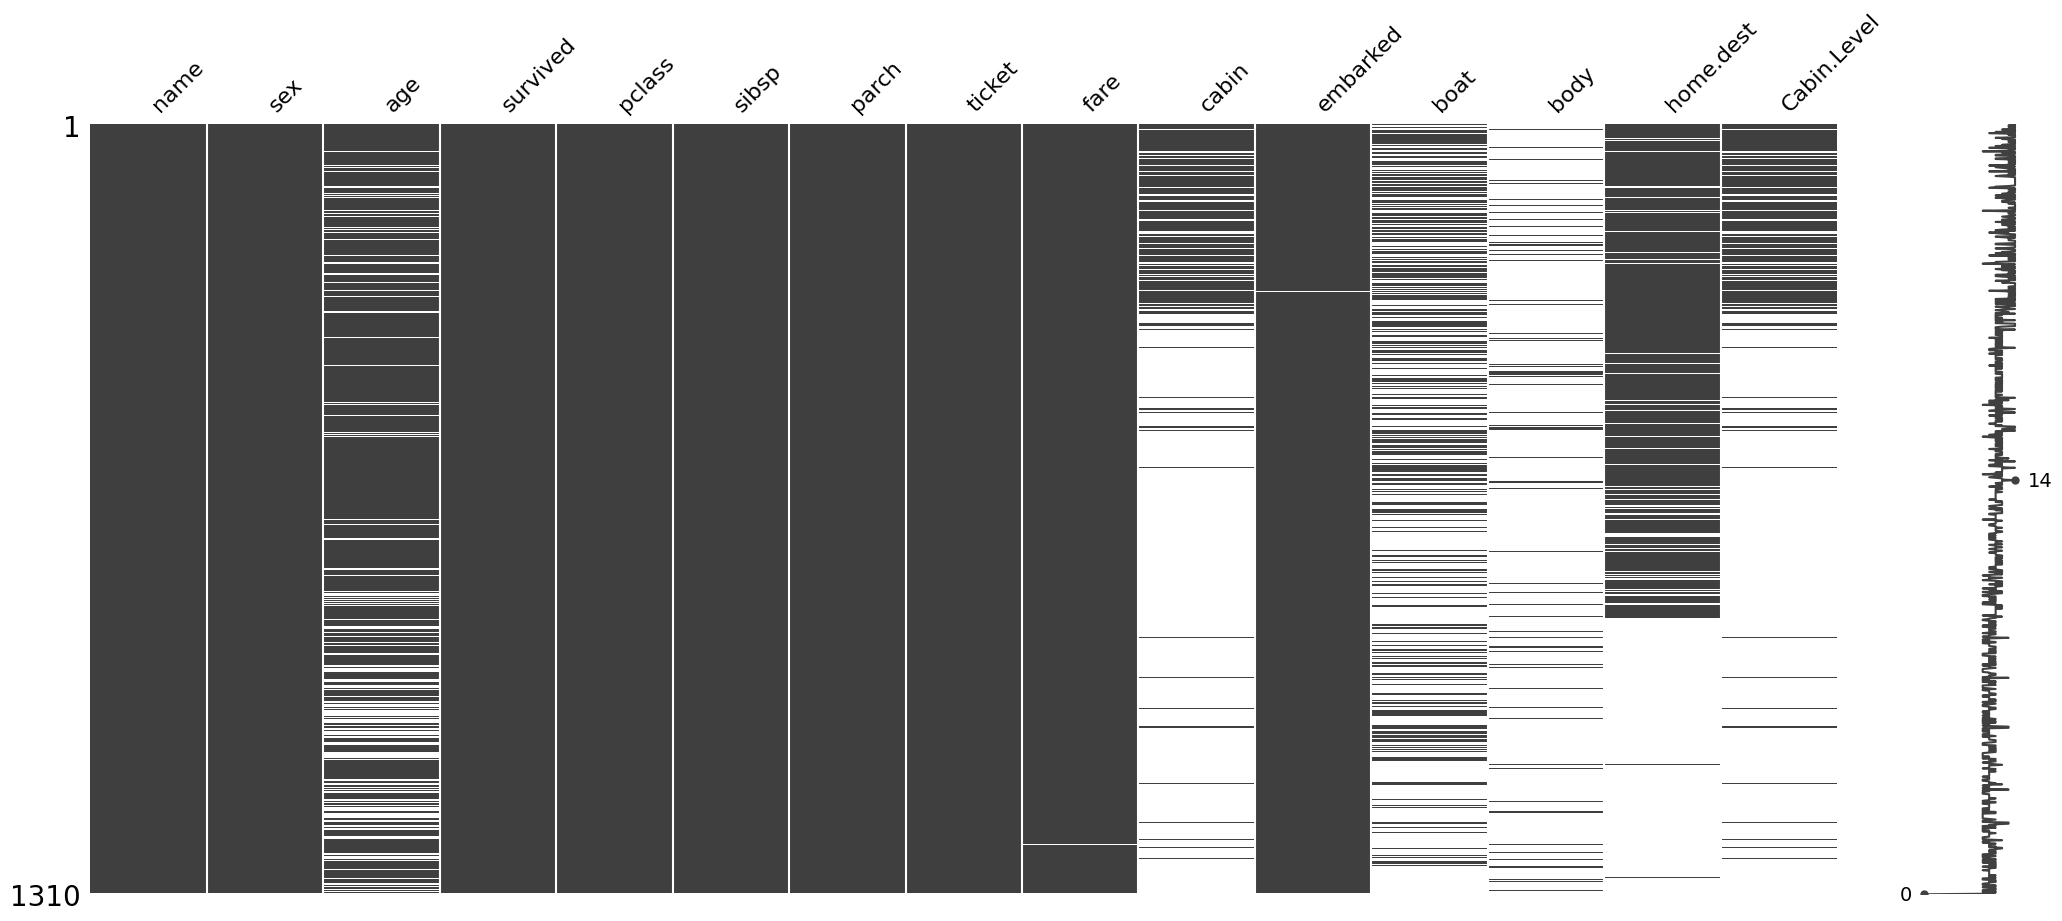

In [46]:
print(merged_df.isnull().sum())
msno.matrix(merged_df)

We have a lot of missing values, especially in cabin, boat, body, home.dest and cabin level, with respecitvely 1015,824,1189,565 and 1015 missing values.

For columns with not a lot of missing values, i will just remove the rows with na in those columns.

For the ones with a lot, i'm gonna delete them later

In [47]:
#Remove rows with NA values

merged_df.dropna(subset = ['age','fare','name','sex','survived','pclass','sibsp'], inplace=True)
merged_df.dropna(subset = ['parch','ticket','embarked'], inplace=True)
print(merged_df)

                                                 name     sex      age  \
0                       Allen, Miss. Elisabeth Walton  female  29.0000   
1                      Allison, Master. Hudson Trevor    male   0.9167   
2                        Allison, Miss. Helen Loraine  female   2.0000   
3                Allison, Mr. Hudson Joshua Creighton    male  30.0000   
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000   
...                                               ...     ...      ...   
1301                             Youseff, Mr. Gerious    male  45.5000   
1304                             Zabour, Miss. Hileni  female  14.5000   
1306                        Zakarian, Mr. Mapriededer    male  26.5000   
1307                              Zakarian, Mr. Ortin    male  27.0000   
1308                               Zimmerman, Mr. Leo    male  29.0000   

      survived  pclass  sibsp  parch  ticket      fare    cabin embarked boat  \
0          1.0     1.0    0.0 

In [48]:
print(merged_df.isnull().sum())

name             0
sex              0
age              0
survived         0
pclass           0
sibsp            0
parch            0
ticket           0
fare             0
cabin          773
embarked         0
boat           628
body           924
home.dest      359
Cabin.Level    773
dtype: int64


I'm also gonna drop some columns, which i won't use later

In [49]:
merged_df = merged_df.drop(["home.dest","body","embarked","cabin",'ticket','name','boat'], axis= "columns")
print(merged_df)

         sex      age  survived  pclass  sibsp  parch      fare Cabin.Level
0     female  29.0000       1.0     1.0    0.0    0.0  211.3375           B
1       male   0.9167       1.0     1.0    1.0    2.0  151.5500           C
2     female   2.0000       0.0     1.0    1.0    2.0  151.5500           C
3       male  30.0000       0.0     1.0    1.0    2.0  151.5500           C
4     female  25.0000       0.0     1.0    1.0    2.0  151.5500           C
...      ...      ...       ...     ...    ...    ...       ...         ...
1301    male  45.5000       0.0     3.0    0.0    0.0    7.2250         NaN
1304  female  14.5000       0.0     3.0    1.0    0.0   14.4542         NaN
1306    male  26.5000       0.0     3.0    0.0    0.0    7.2250         NaN
1307    male  27.0000       0.0     3.0    0.0    0.0    7.2250         NaN
1308    male  29.0000       0.0     3.0    0.0    0.0    7.8750         NaN

[1043 rows x 8 columns]


I dropped home.dest, body, name, ticket and embarked as they are not impacting the survival rate. I also removed the cabins and boat columns as they have too many missing values.


In [50]:
#Exporting to csv
merged_df.to_csv('final_dataset.csv', index=False)

In [51]:
#Creating a new dataframe df, as it's our final dataframe

df = merged_df.copy()

In [52]:
#Survival rate of passengers

survivor_count = df['survived'].value_counts()
passengers_count = len(df)
survivor_rate = (survivor_count[1] / passengers_count) * 100 #Takes the number of people who survived
print(f"The survival rate is {survivor_rate:.2f} %")



The survival rate is 40.75 %


In [53]:
# Calculate survival rate by gender
#'survived' column contains binary values (0 or 1), taking the mean gives the proportion of passengers who survived within each gender group
survival_rate_by_gender = df.groupby('sex')['survived'].mean()

print(survival_rate_by_gender)

sex
female    0.751295
male      0.205479
Name: survived, dtype: float64


In [54]:
# Calculate survival rates by passenger class
survival_rates_by_class = df.groupby('pclass')['survived'].mean()

print(survival_rates_by_class)

# Perform chi-square test of independence
observed_values = df.groupby('pclass')['survived'].value_counts().unstack()
chi2, p_value, _, _ = chi2_contingency(observed_values)

print("P-value:", p_value)

pclass
1.0    0.634752
2.0    0.440613
3.0    0.262000
Name: survived, dtype: float64
P-value: 1.3316434212118316e-23


We can see that the survival rate is varying from around 20% for each class. P1 has 63% survival rate, P2 44% and P3 26%. Using the chi square test of independance, we obtain a really small p value, which suggests that there are significant differences in survival rates across the passenger classes.

In [55]:
# Create age groups
bins = [0, 18, 30, 50, 100]
labels = ['0-17', '18-29', '30-49', '50+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate survival rates by age group
survival_rates_by_age = df.groupby('AgeGroup')['survived'].mean()

print(survival_rates_by_age)

# Perform chi-square test of independence
observed_values = df.groupby('AgeGroup')['survived'].value_counts().unstack()
chi2, p_value, _, _ = chi2_contingency(observed_values)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

AgeGroup
0-17     0.525974
18-29    0.366265
30-49    0.407104
50+      0.398148
Name: survived, dtype: float64
Chi-square statistic: 11.914747832080709
P-value: 0.0076809777198538895


For this one, survival rates are more homogeneous. Using the chi square test of independence again, we can see that p-value = 0.007 < 0.05. It suggests that there is a significant impact of age on the chances of survival.

<ipython-input-56-bbd82b1aabbd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


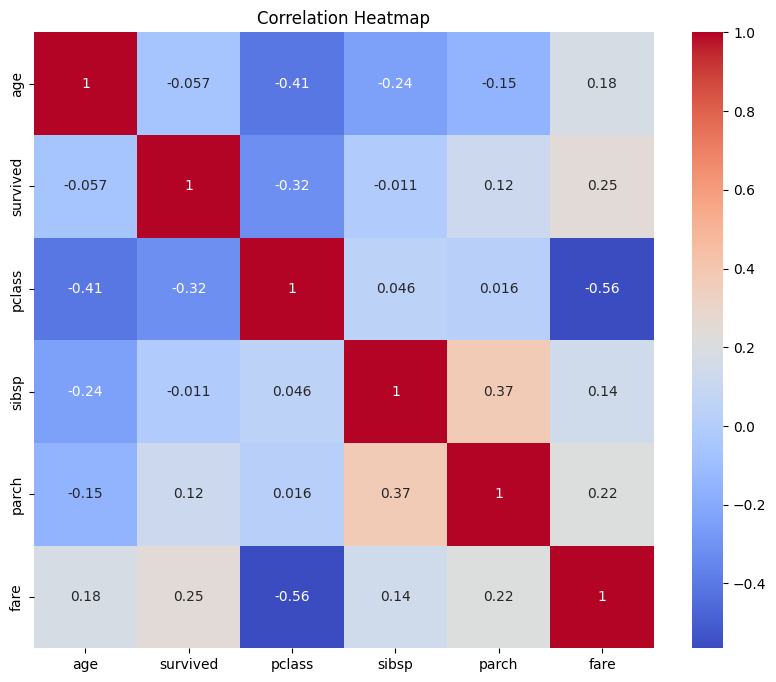

In [56]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

Fare and pclass are the highest correlated feature, with -0.56. We also have age and p class that moderatly correlated, with -0.41

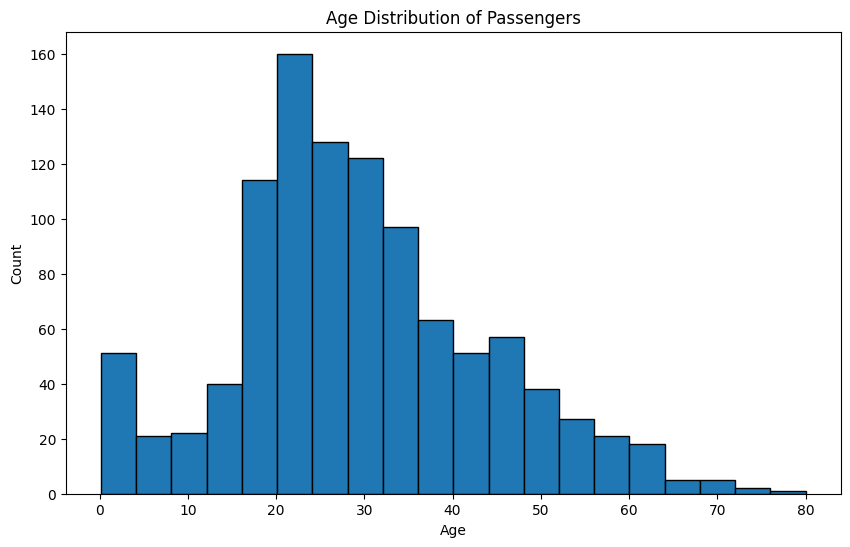

In [57]:
# Create the histogram for age of passengers
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['age'], bins=20, edgecolor='black')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Distribution of Passengers')

plt.show()

We can see that the titanic was mostly populated with people from 18 to 30 years old.

Text(0.5, 1.0, 'Scatter Plot of Age vs Fare')

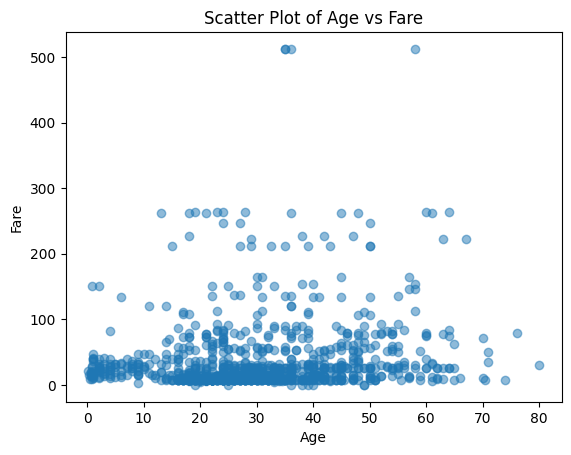

In [58]:
# Create the scatter plot
plt.scatter(df['age'], df['fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')

Using this, we can visualize that it's not because people were aged that they paid more their ticket(better cabin or better services)


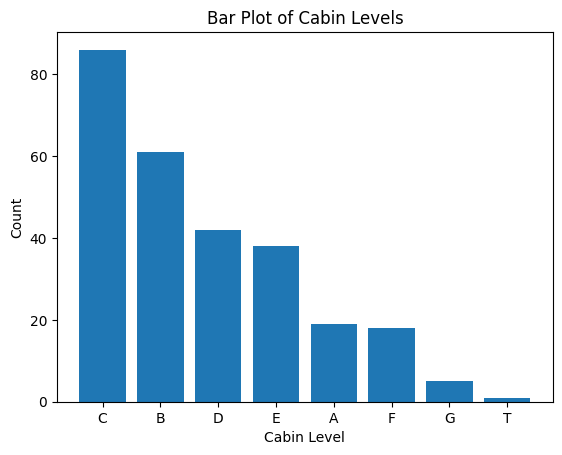

In [59]:
# Count the occurrences of each cabin level
cabin_counts = df['Cabin.Level'].value_counts()

# Create the bar plot
plt.bar(cabin_counts.index, cabin_counts.values)
plt.xlabel('Cabin Level')
plt.ylabel('Count')
plt.title('Bar Plot of Cabin Levels')
plt.show()

We can see that the most used cabin level was the C, going after with the B and then the D

For this logistic regression, i'm gonna use pclass, sex, age, sibsp, parch and fare. All of those are numerical variables, except sex. I'm gonna use label encoding to change male and female to 0 and 1 in the dataframe. This will ease the process for later. The other variables had too many missing values, or were not meaningful for the survival rate.

In [60]:
# Perform label encoding for 'Sex' column
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

In [61]:
# Select the features and target variable
features = ['pclass', 'sex', 'age', 'parch', 'fare']
target = 'survived'
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Create and train the logistic regression model
model = LogisticRegression()
results = model.fit(X_train, y_train)

# No built-in summary method, but you can access coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

#  Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Coefficients: [[-1.16365694e+00 -2.48611965e+00 -3.65653006e-02 -2.17088530e-02
   6.95628599e-04]]
Intercept: [4.67563194]
Precision: 0.76
Recall: 0.6785714285714286
F1 Score: 0.7169811320754718


While running the model, i tried removing sibsp from the features, and it ended up with a higher results, that'why i removed it in the code above. The logistic regression model achieved an accuracy of 78.46%, indicating that it correctly predicted the survival outcome for approximately 78.46% of the test instances. The recall score of 0.63 suggests that the model successfully identified 63% of the actual positive (survived) instances. The F1 score, which combines precision and recall, is 0.69, indicating a reasonable balance between the two metrics. Overall, the logistic regression model performs moderately well in predicting survival outcomes in the Titanic dataset.

In [62]:
#  Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.76
Recall: 0.6785714285714286
F1 Score: 0.7169811320754718


In [63]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


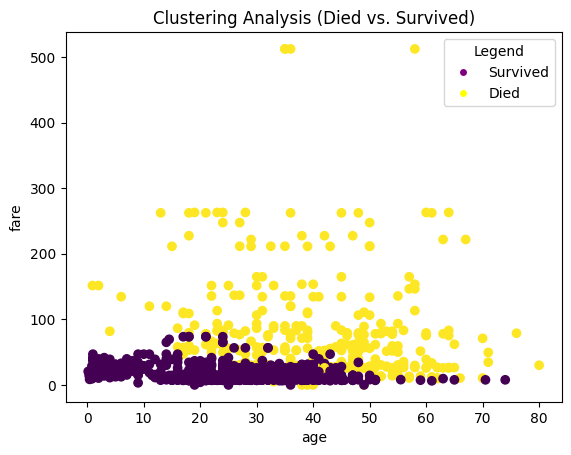

In [64]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=4232)  # Assuming 2 clusters: Died or Survived
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
scatter = plt.scatter(X['age'], X['fare'], c=labels, cmap='viridis')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Clustering Analysis (Died vs. Survived)')

# Create a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', label='Survived'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', label='Died')]
plt.legend(handles=legend_elements, loc='upper right', title='Legend')

# Set the same colormap for scatter plot and legend
scatter.set_cmap('viridis')

plt.show()

In [65]:
# Access the cluster centers
cluster_centers = kmeans.cluster_centers_

# Access the labels assigned to each data point
labels = kmeans.labels_

# Access the inertia (sum of squared distances of samples to their closest cluster center)
inertia = kmeans.inertia_

# Print the information
print("Cluster Centers:")
print(cluster_centers)

print("Inertia:")
print(inertia)

Cluster Centers:
[[ 5.75411854e-01  8.66384763e-02 -3.34158752e-01 -9.60887991e-04
  -3.77930738e-01]
 [-1.29422853e+00 -1.94869096e-01  7.51596944e-01  2.16124963e-03
   8.50049821e-01]]
Inertia:
3823.62513948447


I used the same variable as for the logistic regression.We can see on this graphic that people who paid a higher fare had more chance to survive.

In [66]:
# Step 5: Evaluate Accuracy
survived_labels = df['survived'].values
accuracy2 = accuracy_score(survived_labels, labels)

print("Accuracy:", accuracy2)

Accuracy: 0.6586768935762224


We achieve an accuracy of 65% on this model. It's worse than our logistic regression.

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = model.predict(X_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

Accuracy: 0.784688995215311


#Conclusion


Survival Distribution:

The majority of passengers onboard the Titanic did not survive the disaster, with approximately 62% of the passengers in the dataset labeled as "not survived." This indicates that the survival rate was relatively low.
On the other hand, around 38% of the passengers in the dataset managed to survive the tragedy, which accounts for a smaller proportion of the total passengers.

Age Distribution:

The age distribution of the passengers shows a peak in the young adult range, with a higher concentration of passengers between 20 and 40 years old. This suggests that a significant number of passengers onboard the Titanic belonged to this age group.
Furthermore, there were a considerable number of children (below 10 years old) among the passengers, indicating that families with young children were also present on the ship.

Gender Distribution:

The dataset contains a higher number of male passengers compared to female passengers. This implies that there were more men onboard the Titanic than women.
Interestingly, the survival rate among female passengers was higher compared to male passengers. This observation suggests that there may have been a bias in favor of females when it came to survival during the disaster.

Based on the scatter plot, it can be observed that the passengers who paid higher fares had a higher chance of survival. This suggests that those who paid more for their tickets may have been given priority in terms of safety measures or access to lifeboats.

Regarding the cabin distribution, the cabin with the highest number of occupants was labeled as "C," followed by cabins "B" and "D." This information indicates that a significant portion of the passengers were assigned to these particular cabins.

Additionally, the survival rate is noticeably higher for children between the ages of 0 and 10 years old. This finding suggests that young children had a greater likelihood of survival compared to other age groups during the Titanic disaster.